In [1]:
import pandas as pd
import numpy as np
import os
import shutil
from tensorflow import keras
import cv2

In [2]:
%cd D:\\ML DL AI DSBDA\\Indian Trucks Detection\\Processed Images

D:\ML DL AI DSBDA\Indian Trucks Detection\Processed Images


In [3]:
from imutils import paths
from pathlib import Path

In [4]:
images_path = Path(r"D:\ML DL AI DSBDA\Indian Trucks Detection\Processed Images")
trucks_data = list(paths.list_images(images_path))

In [5]:
trucks_data[0:6]

['D:\\ML DL AI DSBDA\\Indian Trucks Detection\\Processed Images\\0000.jpg',
 'D:\\ML DL AI DSBDA\\Indian Trucks Detection\\Processed Images\\0001.jpg',
 'D:\\ML DL AI DSBDA\\Indian Trucks Detection\\Processed Images\\00010.jpg',
 'D:\\ML DL AI DSBDA\\Indian Trucks Detection\\Processed Images\\000100.jpg',
 'D:\\ML DL AI DSBDA\\Indian Trucks Detection\\Processed Images\\000101.jpg',
 'D:\\ML DL AI DSBDA\\Indian Trucks Detection\\Processed Images\\000102.jpg']

In [6]:
truck_image_data = pd.Series(trucks_data, name="JPG").astype(str)

In [7]:
truck_image_data.head()

0    D:\ML DL AI DSBDA\Indian Trucks Detection\Proc...
1    D:\ML DL AI DSBDA\Indian Trucks Detection\Proc...
2    D:\ML DL AI DSBDA\Indian Trucks Detection\Proc...
3    D:\ML DL AI DSBDA\Indian Trucks Detection\Proc...
4    D:\ML DL AI DSBDA\Indian Trucks Detection\Proc...
Name: JPG, dtype: object

count = 0
for image_path in truck_image_data:
    image = cv2.imread(image_path)
    cv2.imshow("image no: {}".format(count+1), image)
    cv2.waitKey()
    count += 1
    if count == 5:
        break
cv2.destroyAllWindows()

In [8]:
import matplotlib.pyplot as plt

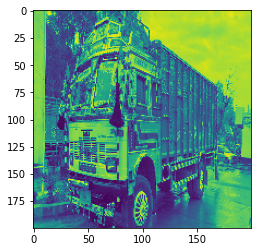

In [9]:
truck_image = cv2.imread("D:\\ML DL AI DSBDA\\Indian Trucks Detection\\Processed Images\\0000.jpg", 0)
plt.imshow(truck_image)
plt.show()

In [10]:
from skimage.morphology import skeletonize

In [11]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
    return Picking_Img

def skeleton_morph_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,Threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    Array_Img = np.array(Gray_Img > Threshold_Img).astype(int)
    Skeleton_Img = skeletonize(Array_Img)
    
    return Skeleton_Img

def threshold_vision(img_path):
    Picking_Img = simple_vision(img_path)
    Gray_Img = cv2.cvtColor(Picking_Img,cv2.COLOR_RGB2GRAY)
    _,threshold_Img = cv2.threshold(Gray_Img,90,255,cv2.THRESH_BINARY_INV)
    
    return threshold_Img

def canny_vision(img_path):
    Threshold_Img = threshold_vision(img_path)
    Canny_Img = cv2.Canny(Threshold_Img,10,100)
    
    return Canny_Img

In [12]:
import random
number = random.randint(0, 466)
global truck_label
truck_label = "Indian Truck"

Text(0.5, 1.0, 'Indian Truck')

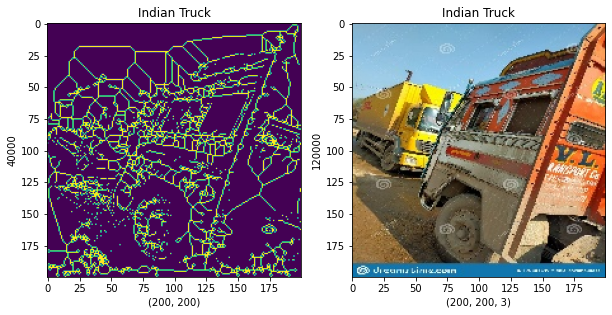

In [13]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(10,10))

Skel_Img = skeleton_morph_vision(truck_image_data[number])
Simple_Img = simple_vision(truck_image_data[number])

axis[0].imshow(Skel_Img)
axis[0].set_xlabel(Skel_Img.shape)
axis[0].set_ylabel(Skel_Img.size)
axis[0].set_title(truck_label)
axis[1].imshow(Simple_Img)
axis[1].set_xlabel(Simple_Img.shape)
axis[1].set_ylabel(Simple_Img.size)
axis[1].set_title(truck_label)

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, array_to_img

In [15]:
cv2.imread(truck_image_data[number])

array([[[204, 179, 139],
        [200, 175, 135],
        [201, 177, 135],
        ...,
        [ 99, 170, 244],
        [ 99, 173, 251],
        [ 87, 165, 242]],

       [[204, 179, 139],
        [203, 179, 137],
        [204, 180, 138],
        ...,
        [ 99, 167, 244],
        [ 95, 166, 246],
        [ 94, 167, 247]],

       [[205, 180, 138],
        [206, 181, 139],
        [207, 182, 140],
        ...,
        [100, 165, 246],
        [102, 166, 251],
        [ 57, 118, 204]],

       ...,

       [[176, 116,  20],
        [174, 115,  15],
        [179, 122,  17],
        ...,
        [180, 122,  17],
        [176, 118,  13],
        [177, 119,  14]],

       [[176, 117,  14],
        [176, 119,  14],
        [173, 118,  13],
        ...,
        [176, 118,  13],
        [176, 118,  15],
        [175, 117,  14]],

       [[177, 119,  13],
        [178, 122,  15],
        [171, 119,  13],
        ...,
        [178, 120,  15],
        [175, 117,  14],
        [177, 118,  18]]

In [16]:
sample_image = cv2.imread(truck_image_data[number])
sample_image.shape

(200, 200, 3)

original_folder = r'D:\ML DL AI DSBDA\Indian Trucks Detection\Processed Images'

train = r'D:\ML DL AI DSBDA\Indian Trucks Detection\train_data'
test = r'D:\ML DL AI DSBDA\Indian Trucks Detection\test_data'
validation = r'D:\ML DL AI DSBDA\Indian Trucks Detection\validation_data'

folder_list = [train, test, validation]
for i in folder_list:
    os.mkdir(i)

images = ['000{}.jpg'.format(i) for i in range(0, 150)]
for image_name in images:
    source_path = os.path.join(original_folder, image_name)
    dest_path = os.path.join(train, image_name)
    shutil.copy(source_path, dest_path)

images = ['000{}.jpg'.format(i) for i in range(150, 251)]
for image_name in images:
    source_path = os.path.join(original_folder, image_name)
    dest_path = os.path.join(validation, image_name)
    shutil.copy(source_path, dest_path)

images = ['000{}.jpg'.format(i) for i in range(251, 466)]
for image_name in images:
    source_path = os.path.join(original_folder, image_name)
    dest_path = os.path.join(test, image_name)
    shutil.copy(source_path, dest_path)

In [17]:
trainImageData = ImageDataGenerator(rescale = 1/255)
validImageData = ImageDataGenerator(rescale = 1/255)

In [18]:
train_dataset = trainImageData.flow_from_directory(
    'D:/ML DL AI DSBDA/Indian Trucks Detection/train_data/',
    target_size = (200, 200),
    batch_size = 3,
    class_mode = 'binary'
)

Found 150 images belonging to 1 classes.


In [19]:
validation_dataset = validImageData.flow_from_directory(
    'D:/ML DL AI DSBDA/Indian Trucks Detection/validation_data/',
    target_size = (200, 200),
    batch_size = 3,
    class_mode = 'binary'
)

Found 101 images belonging to 1 classes.


In [20]:
train_dataset.class_indices

{'truck images': 0}

In [21]:
from keras import layers
from keras.layers import Flatten, Dense, MaxPooling2D, Conv2D
from keras.models import Sequential

In [22]:
truck_model = Sequential([
    Conv2D(16, (3, 3), activation = 'relu', input_shape = (200, 200, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(32, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid'),    
])

In [23]:
truck_model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']   
)

In [24]:
truck_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [25]:
truck_model.fit(
    train_dataset,
    steps_per_epoch = len(train_dataset),
    epochs = 3,
    validation_data = validation_dataset
)

Epoch 1/3
50/50 [==============================] - 12s 217ms/step - loss: 0.0133 - accuracy: 0.9933 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/3
50/50 [==============================] - 11s 211ms/step - loss: 4.3003e-37 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/3
50/50 [==============================] - 11s 220ms/step - loss: 4.2154e-37 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000


In [26]:
testingImageData = ImageDataGenerator(rescale = 1/255)
testing_dataset = validImageData.flow_from_directory(
    'D:/ML DL AI DSBDA/Indian Trucks Detection/test_data/',
    target_size = (200, 200),
    batch_size = 3,
    class_mode = 'binary'
)

Found 215 images belonging to 1 classes.


In [28]:
loss, accuracy = truck_model.evaluate(testing_dataset)

72/72 [==============================] - 2s 25ms/step - loss: 2.5066e-30 - accuracy: 1.0000


In [29]:
from keras.utils import load_img

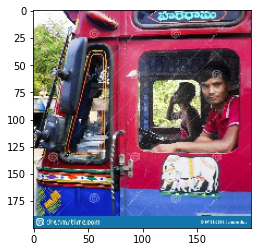

1/1 [==============================] - 0s 110ms/step
Truck


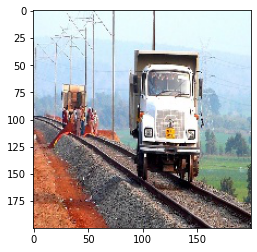

1/1 [==============================] - 0s 27ms/step
Truck


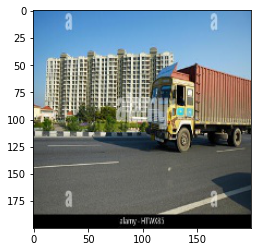

1/1 [==============================] - 0s 25ms/step
Truck


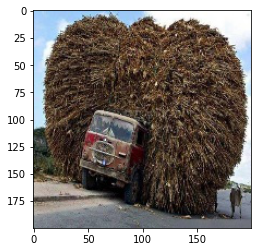

1/1 [==============================] - 0s 28ms/step
Truck


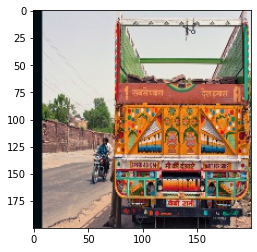

1/1 [==============================] - 0s 39ms/step
Truck


In [35]:
import numpy as np
test_path = "D://ML DL AI DSBDA//Indian Trucks Detection//test_data//truck images"
count = 0
for i in os.listdir(test_path):
    img = load_img(test_path + '/' +i)
    plt.imshow(img)
    plt.show()
    
    X = img_to_array(img)
    x_imag = np.expand_dims(X, axis = 0)
    images = np.vstack([x_imag])
    
    prediction = truck_model.predict(images)
    if prediction == 0:
        print("Truck")
        
    else:
        print("No truck")
        
    count += 1
    if count == 5:
        break   

In [38]:
from keras import models

In [45]:
truck_model_ann = models.Sequential([
    layers.Flatten(input_shape = (200, 200, 3)),
    layers.Dense(3000, activation = "relu"),
    layers.Dense(1000, activation = "relu"),
    Dense(1, activation="sigmoid")
])

In [46]:
truck_model_ann.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 120000)            0         
                                                                 
 dense_7 (Dense)             (None, 3000)              360003000 
                                                                 
 dense_8 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_9 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 363,005,001
Trainable params: 363,005,001
Non-trainable params: 0
_________________________________________________________________


In [47]:
truck_model_ann.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [48]:
history = truck_model_ann.fit(train_dataset, validation_data = validation_dataset, epochs = 2)

Epoch 1/2
50/50 [==============================] - 47s 902ms/step - loss: 0.0295 - accuracy: 0.9800 - val_loss: 2.3213e-17 - val_accuracy: 1.0000
Epoch 2/2
50/50 [==============================] - 41s 820ms/step - loss: 3.7838e-09 - accuracy: 1.0000 - val_loss: 2.3213e-17 - val_accuracy: 1.0000


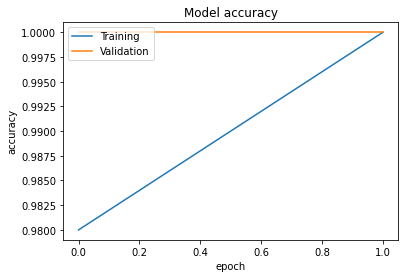

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title("Model accuracy")
plt.legend(['Training', "Validation"], loc = 'upper left')
plt.show()

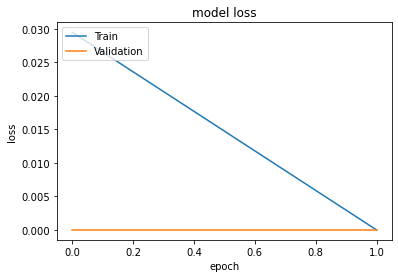

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()